# Introduction

No need to say that the Covid19 crisis is a global challenge that is going to change how we see the world. There is a lot of interest in understanding the internals of virus propagation and several disciplines can be really helpful in this task. There is a lot of data going around and we have really accessible tools to work with this data. 

For any data scientist this is a nice opportunity to explore and understand time series, graph theory and other fascinating disciplines. If you are just a newbie or a consolidated practitioner, I have decided to share a series of Jupyter Notebooks with some examples of tools and methods that you can find helpful. I will make my best to make all the code available.

[Kaggle](http://www.kaggle.com) has opened a challenge to forecast the propagation of the virus. You can check the challenge with more details at the Kaggle site [here](https://www.kaggle.com/c/covid19-global-forecasting-week-2). I invite you to check the notebooks uploaded by the community. I have not considered to participate in the challenge, but this could be a good opportunity if you plan to start with these kind of challenges.

In this part, I will use Kaggle data to show how we can visualize the virus evolution in different manners. You can download the data (after registration) [here](https://www.kaggle.com/c/covid19-global-forecasting-week-2/data). After downloading the zip file with the dataset we have three CSV files:
* train.csv
* test.csv
* submission.csv

For this exercise we will only use the train.csv file.

**Assumptions**
* You have an already running Jupyter environment
* You are familiar with Pandas
* You have heard about Matplotlib
* The covid19 files are available in the path covid19-global-forecasting-week-2

# Loading a CSV with Pandas

There are several solutions to read CSV files in Python. However, with no disussion Pandas is the most suitable option for many scenarios. We import the pandas library and read the csv file with all the training data.

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv("covid19-global-forecasting-week-2/train.csv")
data

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,NaN,2020-01-22,0.0,0.0
1,2,Afghanistan,NaN,2020-01-23,0.0,0.0
2,3,Afghanistan,NaN,2020-01-24,0.0,0.0
3,4,Afghanistan,NaN,2020-01-25,0.0,0.0
4,5,Afghanistan,NaN,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
18811,29360,Zimbabwe,NaN,2020-03-21,3.0,0.0
18812,29361,Zimbabwe,NaN,2020-03-22,3.0,0.0
18813,29362,Zimbabwe,NaN,2020-03-23,3.0,1.0
18814,29363,Zimbabwe,NaN,2020-03-24,3.0,1.0


We have a six columns dataframe indicating the country, state, date, number of confirmed cases and number of fatalities. We are going to focus on one country. Let's say Spain.

In [5]:
spain = data[data['Country_Region']=='Spain']
spain

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities
13376,20901,Spain,NaN,2020-01-22,0.0,0.0
13377,20902,Spain,NaN,2020-01-23,0.0,0.0
13378,20903,Spain,NaN,2020-01-24,0.0,0.0
13379,20904,Spain,NaN,2020-01-25,0.0,0.0
13380,20905,Spain,NaN,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
13435,20960,Spain,NaN,2020-03-21,25374.0,1375.0
13436,20961,Spain,NaN,2020-03-22,28768.0,1772.0
13437,20962,Spain,NaN,2020-03-23,35136.0,2311.0
13438,20963,Spain,NaN,2020-03-24,39885.0,2808.0


We have data for 64 days with no information at a province/state level. Now we would like to have a visual representation of the time series.

# Matplotlib

The first solution to be considered is Pyplot from the [Matplotlib](https://matplotlib.org/) library. 

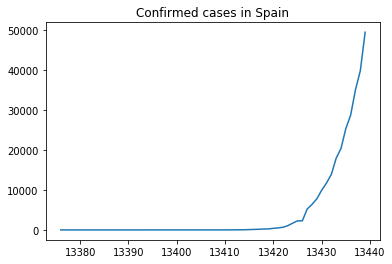

In [6]:
from matplotlib import pyplot

pyplot.plot(spain.ConfirmedCases)
pyplot.title('Confirmed cases in Spain')
pyplot.show()

The figure above is the representation of the number of confirmed cases in Spain until March 26th. We have not set the X axis, so pyplot is considering the id column defined by Pandas. To define a more reasonable X ticks we simply pass a list with the same number of items of the Y axis starting from zero.

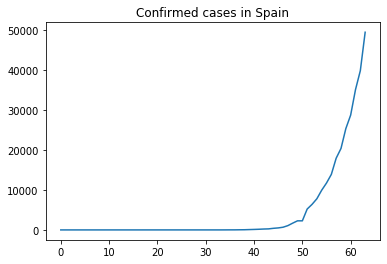

In [7]:
pyplot.plot(range(0,spain.ConfirmedCases.size),spain.ConfirmedCases)
pyplot.title('Confirmed cases in Spain')
pyplot.show()

Now we have a clearer view of the X axis. However, we would like to have a comparison of the number of fatalities vs the number of confirmed cases.

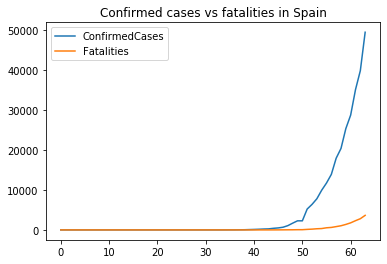

In [8]:
pyplot.plot(range(0,spain.ConfirmedCases.size),spain.ConfirmedCases,label='ConfirmedCases')
pyplot.plot(range(0,spain.Fatalities.size),spain.Fatalities,label='Fatalities')
pyplot.legend()
pyplot.title('Confirmed cases vs fatalities in Spain')
pyplot.show()

The increment shows an exponential behaviour. A logarithmic scale would help a better view.

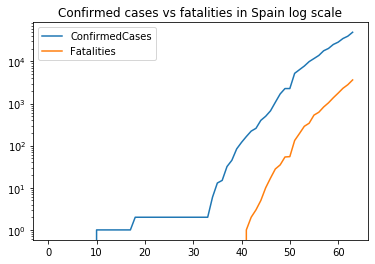

In [9]:
pyplot.plot(range(0,spain.ConfirmedCases.size),spain.ConfirmedCases,label='ConfirmedCases')
pyplot.plot(range(0,spain.Fatalities.size),spain.Fatalities,label='Fatalities')
pyplot.yscale('log')
pyplot.title('Confirmed cases vs fatalities in Spain log scale')
pyplot.legend()
pyplot.show()

What about displaying the date in the X axis? To do that we need pyplot to format the x axis. This requires datetime structures to set the datetime of every observation. We already have them in the Date column. The main difference is setting the formatter for the x axis using *mdates* from *matplotlib*.

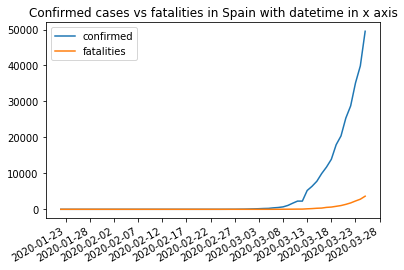

In [10]:
import matplotlib.dates as mdates

# convert date strings to datenums
dates = mdates.datestr2num(spain.Date)

pyplot.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
pyplot.plot(dates,spain.ConfirmedCases,label='confirmed')
pyplot.plot(dates,spain.Fatalities,label='fatalities')
pyplot.title('Confirmed cases vs fatalities in Spain with datetime in x axis')
pyplot.legend()
pyplot.gcf().autofmt_xdate()
pyplot.show()

# Seaborn

For those familiar with [ggplot](https://ggplot2.tidyverse.org/), [Seaborn](https://seaborn.pydata.org) will look familiar. Seaborn is built on top of Matplotlib and offers a high level interface for drawing statistical graphics. It is particularly suitable to used in conjunction with Pandas.

We can replicate some of the plots above:

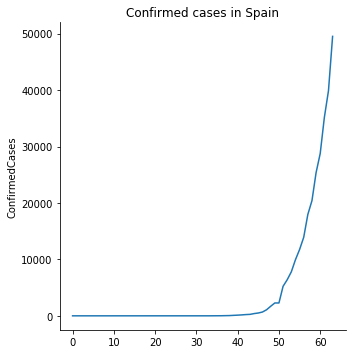

In [11]:
import seaborn as sns

g = sns.relplot(x=range(spain.Date.size),y='ConfirmedCases', data=spain,kind='line',)
g.set_axis_labels(x_var='') # I remove the xlabel for consistency with the previous plot
pyplot.title('Confirmed cases in Spain')
pyplot.show()


To set the x axis with datetimes we do the same we did with matplotlib. However, now we are going to directly transform the Date column from the Pandas Dataframe so we can directly call seaborn to use it.

In [12]:
# Transform the Date column to matplotlib datenum
spain.Date = spain.Date.apply(lambda x : mdates.datestr2num(x))

/Users/juan/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


After this, the Date column type is a datenum that can be used to correctly format the x axis.

(By the way, this operation triggers a warning message. I let you to investigate why this is happening ;) )

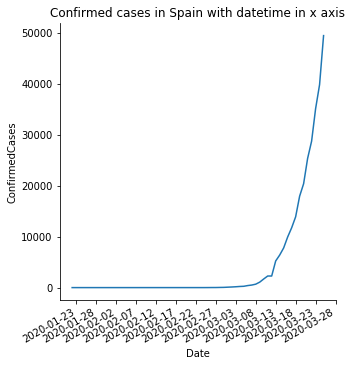

In [14]:
sns.relplot(x='Date',y='ConfirmedCases', data=spain,kind='line',)
pyplot.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
pyplot.gcf().autofmt_xdate()
pyplot.title('Confirmed cases in Spain with datetime in x axis')
pyplot.show()

So far we replicated the same plots we already created using pyplot. Why is this seaborn interesting then? I find seaborn particularly relevant to create plots where we can easily compare different series. What if we try to compare the evolution of cases in different countries? We are going to select a sample of countries and compare their evolutions.

To do that we have to run two operations. 
* First. We filter the countries included in a list.
* Second. For some countries the values per day reflect observations per province. We are only interested in the observations per country and day. We aggregate the confirmed cases and fatalities columns for every country in the same day. 

In [15]:
# sample of countries to study
chosen = ['Spain', 'Iran', 'Singapore', 'France', 'United Kingdom']

# 1) Filter rows which country is in the list  2) group by country and date and finally sum the result
sample = data[data.Country_Region.isin(chosen)].groupby(['Date','Country_Region'], as_index=False,).sum()
sample


,Date,Country_Region,Id,ConfirmedCases,Fatalities
0,2020-01-22,France,112510,0.0,0.0
1,2020-01-22,Iran,13601,0.0,0.0
2,2020-01-22,Singapore,20401,0.0,0.0
3,2020-01-22,Spain,20901,0.0,0.0
4,2020-01-22,United Kingdom,198807,0.0,0.0
...,...,...,...,...,...
315,2020-03-25,France,113140,25600.0,1333.0
316,2020-03-25,Iran,13664,27017.0,2077.0
317,2020-03-25,Singapore,20464,631.0,2.0
318,2020-03-25,Spain,20964,49515.0,3647.0


In [16]:
# As a sanity check we are going to check that the previous operation was correct.
# Lets check how many confirmed cases France had on 2020-03-24
france = data[(data.Country_Region=='France') & (data.Date=='2020-03-24')]
print('These are the values for France on 2020-03-24 before running the aggregation')
display(france)
print('Total number of confirmed cases: ', france.ConfirmedCases.sum())
print('And this is the aggregation we obtained')
sample[(sample.Country_Region=='France') & (sample.Date=='2020-03-24')]

These are the values for France on 2020-03-24 before running the aggregation


,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities
6974,10863,France,French Guiana,2020-03-24,23.0,0.0
7038,10963,France,French Polynesia,2020-03-24,25.0,0.0
7102,11063,France,Guadeloupe,2020-03-24,62.0,1.0
7166,11163,France,Martinique,2020-03-24,57.0,1.0
7230,11263,France,Mayotte,2020-03-24,36.0,0.0
7294,11363,France,New Caledonia,2020-03-24,10.0,0.0
7358,11463,France,Reunion,2020-03-24,94.0,0.0
7422,11563,France,Saint Barthelemy,2020-03-24,3.0,0.0
7486,11663,France,St Martin,2020-03-24,8.0,0.0
7550,11763,France,NaN,2020-03-24,22304.0,1100.0


Total number of confirmed cases:  22622.0
And this is the aggregation we obtained


,Date,Country_Region,Id,ConfirmedCases,Fatalities
310,2020-03-24,France,113130,22622.0,1102.0


We have manually checked that the values we obtained after aggregation are correct. Now we are going to plot a comparison of these values per country.

In [17]:
# remember to transform the date timestamp
sample.Date = sample.Date.apply(lambda x : mdates.datestr2num(x))

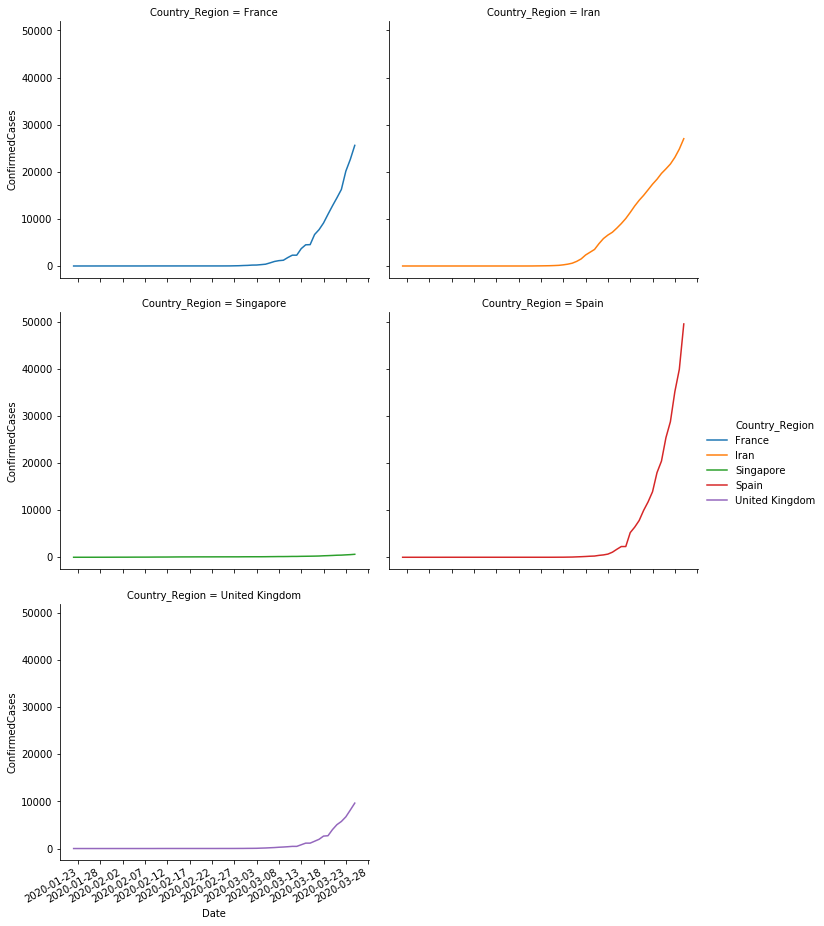

In [18]:
# Confirmed cases
sns.relplot(x='Date',y='ConfirmedCases', col='Country_Region', hue='Country_Region', col_wrap=2, data=sample,kind='line',)
pyplot.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
pyplot.gcf().autofmt_xdate()

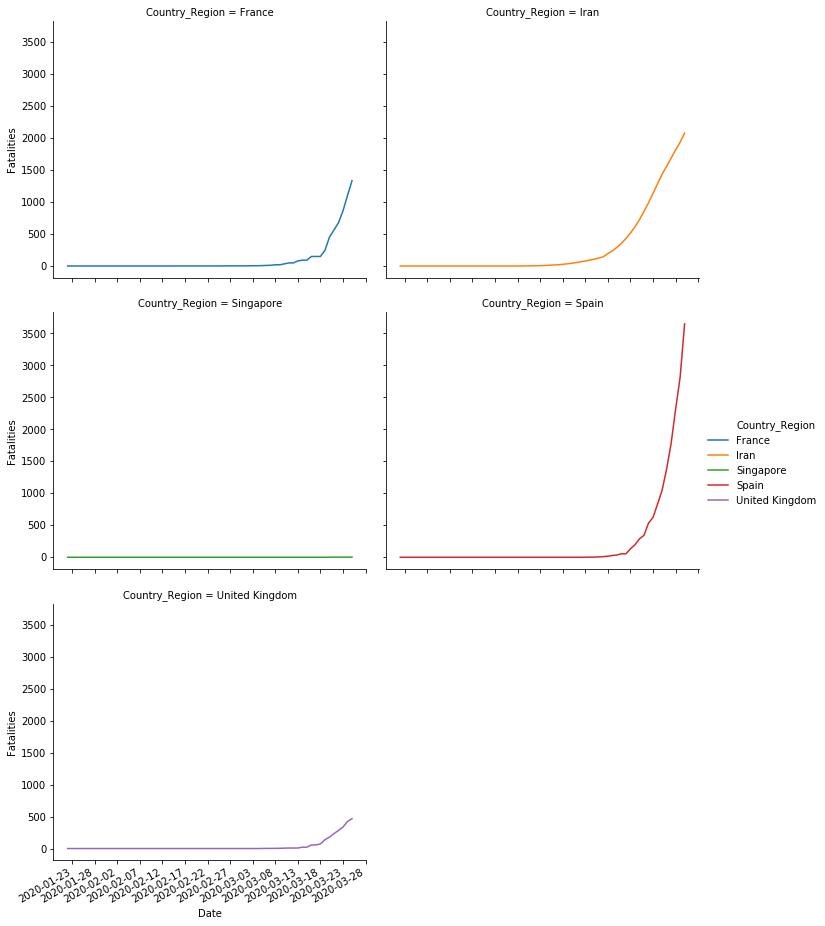

In [19]:
# Fatalities
sns.relplot(x='Date',y='Fatalities', col='Country_Region', hue='Country_Region', col_wrap=2, data=sample,kind='line',)
pyplot.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
pyplot.gcf().autofmt_xdate()

Additionally, we can compare all the timelines in the same plot.

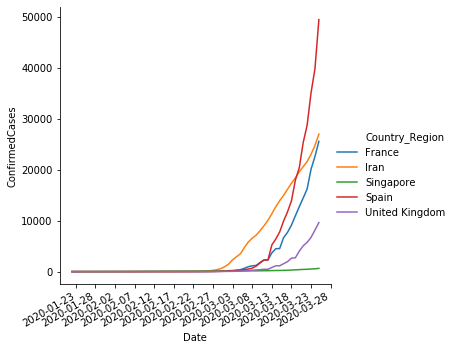

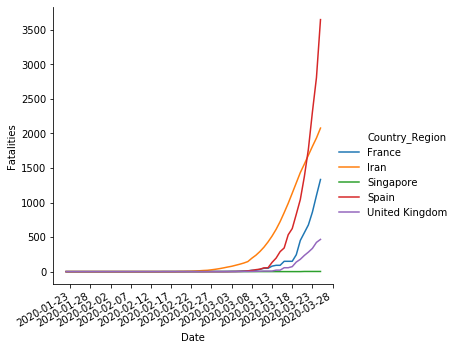

In [20]:
sns.relplot(x='Date',y='ConfirmedCases', hue='Country_Region', data=sample,kind='line',)
pyplot.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
pyplot.gcf().autofmt_xdate()

sns.relplot(x='Date',y='Fatalities', hue='Country_Region', data=sample,kind='line',)
pyplot.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
pyplot.gcf().autofmt_xdate()

# Conclusions

In this notebook we have shown how we can use Python Matplotlib and Seaborn with Pandas to plot the time series corresponding to the Covid19 virus.